In [36]:
# Imported Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [37]:
#Import csv files to python as a dataframe
bets = pd.read_csv(r"C:\Users\elif.erdem\Desktop\Master\IE-582\HW-1\bets.csv") 
booking = pd.read_csv(r"C:\Users\elif.erdem\Desktop\Master\IE-582\HW-1\booking.csv") 
goals = pd.read_csv(r"C:\Users\elif.erdem\Desktop\Master\IE-582\HW-1\goals.csv") 
matches = pd.read_csv(r"C:\Users\elif.erdem\Desktop\Master\IE-582\HW-1\matches.csv") 
stats = pd.read_csv(r"C:\Users\elif.erdem\Desktop\Master\IE-582\HW-1\stats.csv") 

* Matches dataframe consists of the info required for Q1. Hence, this df is analyzed with describe and info detailly.

In [38]:
matches.shape
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 17 columns):
match_awayteam_id                5137 non-null int64
match_hometeam_id                5137 non-null int64
match_id                         5137 non-null int64
epoch                            5137 non-null int64
match_status                     5073 non-null object
match_live                       5137 non-null int64
match_hometeam_name              5137 non-null object
match_awayteam_name              5137 non-null object
match_hometeam_score             5073 non-null float64
match_awayteam_score             5073 non-null float64
match_hometeam_halftime_score    4711 non-null float64
match_awayteam_halftime_score    4711 non-null float64
match_hometeam_extra_score       4711 non-null float64
match_awayteam_extra_score       4711 non-null float64
match_hometeam_penalty_score     0 non-null float64
match_awayteam_penalty_score     0 non-null float64
league_id                       

* Type of columns which are with match_status, match_hometeam_name, match_awayteam_name is not numerical.
* Match_status, match_hometeam_score, match_awayteam_score,match_hometeam_halftime_score, match_awayteam_halftime_score,match_hometeam_extra_score, match_awayteam_extra_score, match_hometeam_penalty_score, match_awayteam_penalty_score columns have missing values.
* match_awayteam_penalty_score , match_hometeam_penalty_score  columns can be dropped since they do not include any info.


In [39]:
matches = matches.drop(columns=['match_hometeam_penalty_score', 'match_awayteam_penalty_score'])

In [40]:
matches.describe()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_live,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,league_id
count,5137.000000,5137.00000,5137.000000,5.137000e+03,5137.0,5073.000000,5073.000000,4711.000000,4711.000000,4711.000000,4711.000000,5137.000000
mean,4531.758809,4531.84232,142888.798521,1.539031e+09,0.0,1.571260,1.217426,0.673955,0.523456,0.673955,0.523456,287.737201
std,1942.916147,1942.99576,69741.254602,1.992203e+07,0.0,1.275102,1.172535,0.816132,0.731627,0.816132,0.731627,140.939789
min,2611.000000,2611.00000,13274.000000,1.505560e+09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.000000
25%,2679.000000,2679.00000,79111.000000,1.520015e+09,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149.000000
50%,4171.000000,4171.00000,146838.000000,1.541254e+09,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,262.000000
75%,7097.000000,7097.00000,196510.000000,1.554642e+09,0.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,468.000000
max,7670.000000,7670.00000,318015.000000,1.571512e+09,0.0,8.000000,7.000000,6.000000,5.000000,6.000000,5.000000,512.000000


* Columns that are match_hometeam_score, match_awayteam_score, match_hometeam_halftime_score, match_awayteam_halftime_score, match_hometeam_extra_score, match_awayteam_extra_score analyzed min, max and mean values to analyze outliers

- English premier league is analyzed for the Q1. Hence, the raw data is limited for the LeagueId=148(EnglishPremier)

In [41]:
matches_premier= matches[matches['league_id']==148]

In [42]:
matches_premier.head(2)

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,league_id
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,148
5,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0.0,6.0,0.0,3.0,0.0,3.0,148


In [43]:
matches_premier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 1 to 5118
Data columns (total 15 columns):
match_awayteam_id                628 non-null int64
match_hometeam_id                628 non-null int64
match_id                         628 non-null int64
epoch                            628 non-null int64
match_status                     618 non-null object
match_live                       628 non-null int64
match_hometeam_name              628 non-null object
match_awayteam_name              628 non-null object
match_hometeam_score             618 non-null float64
match_awayteam_score             618 non-null float64
match_hometeam_halftime_score    569 non-null float64
match_awayteam_halftime_score    569 non-null float64
match_hometeam_extra_score       569 non-null float64
match_awayteam_extra_score       569 non-null float64
league_id                        628 non-null int64
dtypes: float64(6), int64(6), object(3)
memory usage: 78.5+ KB


In [44]:
matches_premier = matches_premier[matches_premier['match_status']=='Finished']

* Match_satus=Finished is selected

In [45]:
matches_premier = matches_premier.drop_duplicates()
matches_premier['match_id'].duplicated().unique()

array([False])

* Duplicate values and NAN values ara dropped.

In [46]:
matches_premier.shape

(618, 15)

In [47]:
matches_premier = matches_premier[matches_premier['match_hometeam_score'].notnull()]

In [48]:
matches_premier = matches_premier[matches_premier['match_awayteam_score'].notnull()]

* Each match must contain scores

In [50]:
matches_premier_control = matches_premier.groupby(['match_id']).count()

In [51]:
matches_premier_control.shape

(618, 14)

* Data is singuler based of match_id.

In [52]:
matches_premier = matches_premier[['match_id', 'match_hometeam_score', 'match_awayteam_score', 'match_hometeam_extra_score', 'match_awayteam_extra_score']]

In [54]:
matches_premier['difference'] =  matches_premier['match_hometeam_score'] -  matches_premier['match_awayteam_score']

* Only neccessary columns are selected

In [20]:
matches_premier.describe()

,match_id,match_hometeam_score,match_awayteam_score,match_hometeam_extra_score,match_awayteam_extra_score,difference
count,618.000000,618.000000,618.000000,569.000000,569.000000,618.000000
mean,134960.289644,1.601942,1.228155,0.687170,0.555360,0.373786
std,63490.631354,1.314474,1.181180,0.884447,0.765113,1.889429
min,13274.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,75030.750000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,145185.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,183814.750000,2.000000,2.000000,1.000000,1.000000,2.000000
max,307209.000000,8.000000,6.000000,5.000000,3.000000,8.000000


# Task 1 

In [68]:
mean = matches_premier['match_hometeam_score'].mean()

In [73]:
size= int(matches_premier['match_hometeam_score'].size)

In [74]:
bins_home =int( matches_premier['match_hometeam_score'].max())

In [76]:
range_min_home= int(matches_premier['match_hometeam_score'].min())

Text(0, 0.5, 'Number of Games')

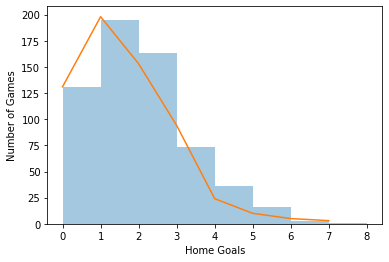

In [77]:
sns.distplot(matches_premier.match_hometeam_score, kde=False, bins = bins_home) ## bins= max(match_hometeam_score)
poissonpmf = np.histogram(np.random.poisson(lam =mean, size = size),
                            bins=bins_home, range=(range_min_home, bins_home))
plt.plot(poissonpmf[0])
plt.xlabel('Home Goals')
plt.ylabel('Number of Games')


In [78]:
bins_away =int( matches_premier['match_awayteam_score'].max())

In [79]:
size_away= int(matches_premier['match_awayteam_score'].size)

In [80]:
mean_away = matches_premier['match_awayteam_score'].mean()

In [81]:
range_min_away= int(matches_premier['match_awayteam_score'].min())

Text(0, 0.5, 'Number of Games')

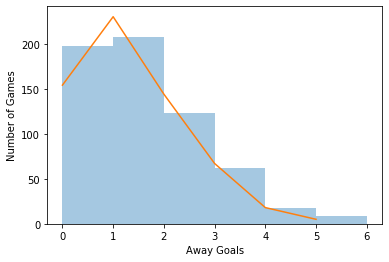

In [82]:
sns.distplot(matches_premier.match_awayteam_score, kde=False, bins = bins_away)#bins=max(match_awayteam_score)
poissonpmf = np.histogram(np.random.poisson(lam =mean_away, size = size_away),
                            bins=bins_away, range=(range_min_away, bins_away))
plt.plot(poissonpmf[0])
plt.xlabel('Away Goals')
plt.ylabel('Number of Games')


* The first two plots are consistent with Poisson distribution

Text(0, 0.5, 'Number of Games')

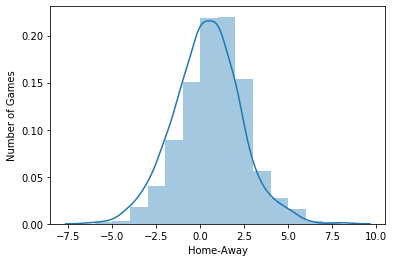

In [237]:
sns.distplot(matches_premier.difference,  bins = 14) ##bins= max(difference) -min(difference)
plt.xlabel('Home-Away')
plt.ylabel('Number of Games')

In [84]:
matches_premier.describe()

,match_id,match_hometeam_score,match_awayteam_score,match_hometeam_extra_score,match_awayteam_extra_score,difference
count,618.000000,618.000000,618.000000,569.000000,569.000000,618.000000
mean,134960.289644,1.601942,1.228155,0.687170,0.555360,0.373786
std,63490.631354,1.314474,1.181180,0.884447,0.765113,1.889429
min,13274.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,75030.750000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,145185.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,183814.750000,2.000000,2.000000,1.000000,1.000000,2.000000
max,307209.000000,8.000000,6.000000,5.000000,3.000000,8.000000


# Task - 2

In [88]:
bets.head(5)

,match_id,odd_bookmakers,odd_epoch,variable,value
0,146845,BetOlimp,1486301854,odd_1,1.96
1,151780,10Bet,1486314920,odd_1,2.15
2,151780,18bet,1486314920,odd_1,2.17
3,151780,1xBet,1486314920,odd_1,2.20
4,151780,5Dimes,1486314920,odd_1,2.23


In [89]:
bets = bets[bets["odd_bookmakers"].isin(['10Bet', 'bwin', 'Unibet', 'Marathonbet'])]

In [90]:
bets = bets[bets['variable'].isin(['odd_1', 'odd_x', 'odd_2'])]

In [91]:
bets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31713 entries, 1 to 2118461
Data columns (total 5 columns):
match_id          31713 non-null int64
odd_bookmakers    31713 non-null object
odd_epoch         31713 non-null int64
variable          31713 non-null object
value             31713 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ MB


* There is no NaN value

In [92]:
bets.describe()

,match_id,odd_epoch,value
count,31713.000000,3.171300e+04,31713.000000
mean,203653.726611,1.541379e+09,3.600759
std,34813.350460,2.692774e+07,2.424750
min,145899.000000,1.486315e+09,1.020000
25%,172366.000000,1.509548e+09,2.300000
50%,198611.000000,1.550907e+09,3.200000
75%,227535.000000,1.564154e+09,3.900000
max,317867.000000,1.570729e+09,34.000000


* especially values columns are analyzed in spite of min, max or mean

In [94]:
bets_maxepoch = bets.groupby(['match_id', 'odd_bookmakers', 'variable'])['odd_epoch'].max().reset_index()

In [95]:
bets_maxepoch.head(2)

,match_id,odd_bookmakers,variable,odd_epoch
0,145899,10Bet,odd_1,1489305781
1,145899,10Bet,odd_2,1489305781


In [550]:
bets.head(2)

,match_id,odd_bookmakers,odd_epoch,variable,value
1,151780,10Bet,1486314920,odd_1,2.15
10,151780,bwin,1486314920,odd_1,2.15


In [96]:
bets = pd.merge (bets,bets_maxepoch, how='right', on=bets_maxepoch.columns.tolist())

In [552]:
bets_control = bets.groupby(['match_id', 'odd_bookmakers', 'odd_epoch', 'variable']).count()
bets_control.shape

(24825, 1)

In [553]:
bets.shape

(24825, 5)

 * Data must be singular based on matchid, odd_bookmakers,odd_epoch, variable

* Based on match_id, odd_bookmakers, odd_epoch must be 3 type of variable and 3 row count

In [97]:
bets_pivot = pd.pivot_table(bets,index=['match_id','odd_bookmakers','odd_epoch'] ,columns='variable',values='value').reset_index()

In [99]:
bets_pivot.head(2)

variable,match_id,odd_bookmakers,odd_epoch,odd_1,odd_2,odd_x
0,145899,10Bet,1489305781,6.75,1.29,5.25
1,145899,Marathonbet,1489305781,7.60,1.44,4.75


In [100]:
bets_pivot['prob_odd_1'] = 1/bets_pivot['odd_1']
bets_pivot['prob_odd_x'] = 1/bets_pivot['odd_x']
bets_pivot['prob_odd_2'] = 1/bets_pivot['odd_2']

In [101]:
bets_pivot['normalization'] = bets_pivot['prob_odd_1'] + bets_pivot['prob_odd_x'] + bets_pivot['prob_odd_2']

In [103]:
bets_pivot['norm_odd_1'] = bets_pivot['prob_odd_1'] / bets_pivot['normalization']
bets_pivot['norm_odd_2'] = bets_pivot['prob_odd_2'] / bets_pivot['normalization']
bets_pivot['norm_odd_x'] = bets_pivot['prob_odd_x'] / bets_pivot['normalization']

In [111]:
bets_pivot.head(2)

,match_id,odd_bookmakers,odd_epoch,odd_1,odd_2,odd_x,prob_odd_1,prob_odd_x,prob_odd_2,normalization,norm_odd_1,norm_odd_2,norm_odd_x,match_hometeam_score,match_awayteam_score,match_hometeam_extra_score,match_awayteam_extra_score
0,150842,Marathonbet,1486711421,5.2,1.75,3.7,0.192308,0.27027,0.571429,1.034007,0.185983,0.552635,0.261382,0.0,0.0,0.0,0.0
1,150844,Marathonbet,1486711426,3.1,2.44,3.3,0.322581,0.30303,0.409836,1.035447,0.311538,0.395806,0.292657,3.0,1.0,1.0,0.0


In [110]:
matches_premier.head(2)

,match_id,match_hometeam_score,match_awayteam_score,match_hometeam_extra_score,match_awayteam_extra_score,difference
1,13331,0.0,1.0,0.0,1.0,-1.0
5,13329,0.0,6.0,0.0,3.0,-6.0


In [109]:
bets_pivot = pd.merge(matches_premier, bets_pivot, how='inner', on='match_id')[bets_pivot.columns.tolist() + ['match_hometeam_score', 'match_awayteam_score', 'match_hometeam_extra_score', 'match_awayteam_extra_score']]

KeyError: "['match_hometeam_score', 'match_awayteam_extra_score', 'match_awayteam_score', 'match_hometeam_extra_score'] not in index"

In [113]:
bets_pivot['home-away'] = bets_pivot['prob_odd_1'] -  bets_pivot['prob_odd_2']


In [114]:
bets_pivot['draw_flag'] = np.where(bets_pivot.match_hometeam_score - bets_pivot.match_awayteam_score==0, 1, 0)

In [125]:
bets_pivot.head(2)

,match_id,odd_bookmakers,odd_epoch,odd_1,odd_2,odd_x,prob_odd_1,prob_odd_x,prob_odd_2,normalization,norm_odd_1,norm_odd_2,norm_odd_x,match_hometeam_score,match_awayteam_score,match_hometeam_extra_score,match_awayteam_extra_score,home-away,draw_flag
0,150842,Marathonbet,1486711421,5.2,1.75,3.7,0.192308,0.27027,0.571429,1.034007,0.185983,0.552635,0.261382,0.0,0.0,0.0,0.0,-0.379121,1
1,150844,Marathonbet,1486711426,3.1,2.44,3.3,0.322581,0.30303,0.409836,1.035447,0.311538,0.395806,0.292657,3.0,1.0,1.0,0.0,-0.087255,0


In [117]:
bin_data = bets_pivot[bets_pivot['odd_bookmakers']=='Marathonbet'][['home-away', 'draw_flag']]
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
bin_data['range'] = pd.cut(bin_data['home-away'], bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], right=True, labels=False)+1

In [130]:
actual = bin_data.groupby(['range']).sum()/bin_data.groupby(['range']).count()

In [131]:
bin_ranges = []
for i in range(len(bins)-1):
    bin_ranges.append((bins[i]+ bins[i+1])/2)

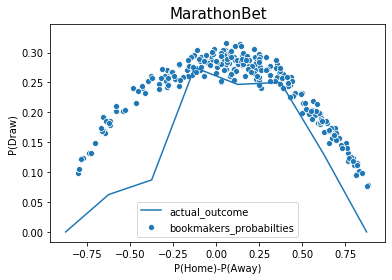

In [236]:
ax = sns.scatterplot(x="home-away", 
                       y="norm_odd_x",
                       data=bets_pivot[bets_pivot['odd_bookmakers']=='Marathonbet']).set_title('MarathonBet', fontsize = 15)

plt.plot(bin_ranges,actual['draw_flag'])
plt.xlabel('P(Home)-P(Away)')
plt.ylabel('P(Draw)')
plt.legend(loc='best', labels=['actual_outcome', 'bookmakers_probabilties'])


In [139]:
bin_data = bets_pivot[bets_pivot['odd_bookmakers']=='10Bet'][['home-away', 'draw_flag']]
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
bin_data['range'] = pd.cut(bin_data['home-away'], bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], right=True, labels=False)+1

In [140]:
actual = bin_data.groupby(['range']).sum()/bin_data.groupby(['range']).count()

In [141]:
bin_ranges = []
for i in range(len(bins)-1):
    bin_ranges.append((bins[i]+ bins[i+1])/2)

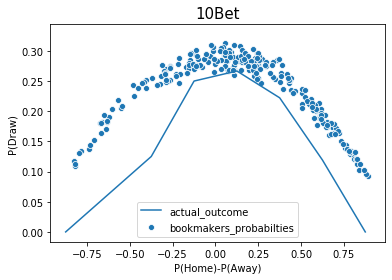

In [227]:
ax = sns.scatterplot(x="home-away", 
                       y="norm_odd_x",
                       data=bets_pivot[bets_pivot['odd_bookmakers']=='10Bet']).set_title('10Bet', fontsize = 15)

plt.plot(bin_ranges,actual['draw_flag'])
plt.xlabel('P(Home)-P(Away)')
plt.ylabel('P(Draw)')
plt.legend(loc='best', labels=['actual_outcome', 'bookmakers_probabilties'])

In [143]:
bin_data = bets_pivot[bets_pivot['odd_bookmakers']=='bwin'][['home-away', 'draw_flag']]
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
bin_data['range'] = pd.cut(bin_data['home-away'], bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], right=True, labels=False)+1
actual = bin_data.groupby(['range']).sum()/bin_data.groupby(['range']).count()
bin_ranges = []
for i in range(len(bins)-1):
    bin_ranges.append((bins[i]+ bins[i+1])/2)

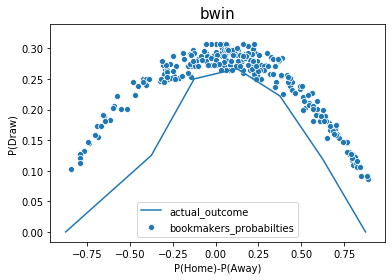

In [228]:
ax = sns.scatterplot(x="home-away", 
                       y="norm_odd_x",
                       data=bets_pivot[bets_pivot['odd_bookmakers']=='bwin']).set_title('bwin', fontsize = 15)

plt.plot(bin_ranges,actual['draw_flag'])
plt.xlabel('P(Home)-P(Away)')
plt.ylabel('P(Draw)')
plt.legend(loc='best', labels=['actual_outcome', 'bookmakers_probabilties'])

In [146]:
bin_data = bets_pivot[bets_pivot['odd_bookmakers']=='Unibet'][['home-away', 'draw_flag']]
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
bin_data['range'] = pd.cut(bin_data['home-away'], bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], right=True, labels=False)+1
actual = bin_data.groupby(['range']).sum()/bin_data.groupby(['range']).count()
bin_ranges = []
for i in range(len(bins)-1):
    bin_ranges.append((bins[i]+ bins[i+1])/2)

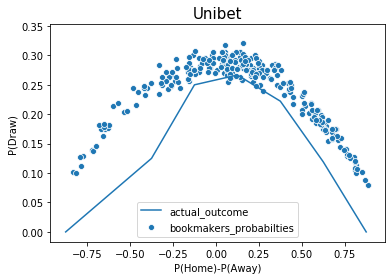

In [229]:
ax = sns.scatterplot(x="home-away", 
                       y="norm_odd_x",
                       data=bets_pivot[bets_pivot['odd_bookmakers']=='Unibet']).set_title('Unibet', fontsize = 15)


plt.plot(bin_ranges,actual['draw_flag'])
plt.xlabel('P(Home)-P(Away)')
plt.ylabel('P(Draw)')
plt.legend(loc='best', labels=['actual_outcome', 'bookmakers_probabilties'])

* Odds has not been well-aligned with the actual outcome of the matches in any case


## Task - 3

In [386]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14920 entries, 1 to 16613
Data columns (total 5 columns):
match_id      14920 non-null int64
time          14920 non-null object
home_fault    7093 non-null object
card          14920 non-null object
away_fault    7813 non-null object
dtypes: int64(1), object(4)
memory usage: 699.4+ KB


In [150]:
booking.shape

(16615, 5)

In [152]:
booking = booking[~(booking['time'].str.contains('\+'))]

In [153]:
booking_for10min = booking[(booking['time'].astype(int)<10) & (booking['card']=='red card')] 

In [158]:
list_red=booking_for10min['match_id']

In [159]:
list_red

867      <class 'list'>
1900     <class 'list'>
2320     <class 'list'>
5296     <class 'list'>
5527     <class 'list'>
6151     <class 'list'>
6621     <class 'list'>
7563     <class 'list'>
8344     <class 'list'>
9029     <class 'list'>
9377     <class 'list'>
10781    <class 'list'>
10838    <class 'list'>
10850    <class 'list'>
11037    <class 'list'>
13986    <class 'list'>
15024    <class 'list'>
Name: match_id, dtype: object

In [160]:
bets_pivot['red_card_flag'] = np.where(bets_pivot['match_id'].isin(list_red), 
                             1, 0)

In [163]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 5 columns):
match_id       11825 non-null int64
time           11825 non-null object
home_scorer    6744 non-null object
score          11825 non-null object
away_scorer    5045 non-null object
dtypes: int64(1), object(4)
memory usage: 462.0+ KB


In [171]:
goals_after_90 = goals[goals['time']>'90']

In [175]:
goals_after_90['Home_Score']=[int(i.split(' - ', 1)[0]) for i in goals_after_90['score']]
goals_after_90['Away_Score']=[int(i.split(' - ', 1)[1]) for i in goals_after_90['score']]

C:\Users\elif.erdem\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\elif.erdem\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [180]:
goals_after_90['Is_Draw'] = np.where(goals_after_90['Home_Score'] - goals_after_90['Away_Score']==0,
                             1, 0)

C:\Users\elif.erdem\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [182]:
goals_after_90['Is_Draw_Previous'] =  np.where(abs(goals_after_90['Home_Score'] - goals_after_90['Away_Score'])==1,
                             1, 0)

C:\Users\elif.erdem\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [192]:
goals_after = goals_after_90[(goals_after_90['Is_Draw']==1) | (goals_after_90['Is_Draw_Previous']==1) ]

In [194]:
bets_pivot.head(2)

,match_id,odd_bookmakers,odd_epoch,odd_1,odd_2,odd_x,prob_odd_1,prob_odd_x,prob_odd_2,normalization,norm_odd_1,norm_odd_2,norm_odd_x,match_hometeam_score,match_awayteam_score,match_hometeam_extra_score,match_awayteam_extra_score,home-away,draw_flag,red_card_flag
0,150842,Marathonbet,1486711421,5.2,1.75,3.7,0.192308,0.27027,0.571429,1.034007,0.185983,0.552635,0.261382,0.0,0.0,0.0,0.0,-0.379121,1,0
1,150844,Marathonbet,1486711426,3.1,2.44,3.3,0.322581,0.30303,0.409836,1.035447,0.311538,0.395806,0.292657,3.0,1.0,1.0,0.0,-0.087255,0,0


In [195]:
goals_after.head(2)

,match_id,time,home_scorer,score,away_scorer,Home_Score,Away_Score,Is_Draw,Is_Draw_Previous
13,13450,90+5,Bamba S.,1 - 1,NaN,1,1,1,0
125,45381,90+1,Mezenga B.,1 - 1,NaN,1,1,1,0


In [205]:
bets_final = pd.merge(bets_pivot, goals_after, how='left', on='match_id')[bets_pivot.columns.tolist() + ['Is_Draw', 'Is_Draw_Previous'] ]

In [206]:
bets_final.head()

,match_id,odd_bookmakers,odd_epoch,odd_1,odd_2,odd_x,prob_odd_1,prob_odd_x,prob_odd_2,normalization,...,norm_odd_x,match_hometeam_score,match_awayteam_score,match_hometeam_extra_score,match_awayteam_extra_score,home-away,draw_flag,red_card_flag,Is_Draw,Is_Draw_Previous
0,150842,Marathonbet,1486711421,5.20,1.75,3.70,0.192308,0.270270,0.571429,1.034007,...,0.261382,0.0,0.0,0.0,0.0,-0.379121,1,0,NaN,NaN
1,150844,Marathonbet,1486711426,3.10,2.44,3.30,0.322581,0.303030,0.409836,1.035447,...,0.292657,3.0,1.0,1.0,0.0,-0.087255,0,0,NaN,NaN
2,150844,bwin,1486711426,2.55,2.40,3.30,0.392157,0.303030,0.416667,1.111854,...,0.272545,3.0,1.0,1.0,0.0,-0.024510,0,0,NaN,NaN
3,156848,Unibet,1489911793,2.75,2.60,3.10,0.363636,0.322581,0.384615,1.070832,...,0.301243,3.0,1.0,1.0,1.0,-0.020979,0,0,NaN,NaN
4,156847,10Bet,1489911773,1.65,5.30,3.55,0.606061,0.281690,0.188679,1.076430,...,0.261689,2.0,0.0,2.0,0.0,0.417381,0,0,NaN,NaN


In [207]:
bets_final = bets_final[~((bets_final['red_card_flag']==1) | (bets_final['Is_Draw']==1) 
                        |(bets_final['Is_Draw_Previous']==1)) ]

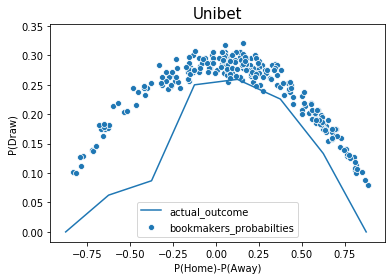

In [230]:
bin_data = bets_final[bets_final['odd_bookmakers']=='Unibet'][['home-away', 'draw_flag']]
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
bin_data['range'] = pd.cut(bin_data['home-away'], bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], right=True, labels=False)+1
actual = bin_data.groupby(['range']).sum()/bin_data.groupby(['range']).count()
bin_ranges = []
for i in range(len(bins)-1):
    bin_ranges.append((bins[i]+ bins[i+1])/2)
ax = sns.scatterplot(x="home-away", 
                       y="norm_odd_x",
                       data=bets_final[bets_final['odd_bookmakers']=='Unibet']).set_title('Unibet', fontsize = 15)


plt.plot(bin_ranges,actual['draw_flag'])
plt.xlabel('P(Home)-P(Away)')
plt.ylabel('P(Draw)')
plt.legend(loc='best', labels=['actual_outcome', 'bookmakers_probabilties'])

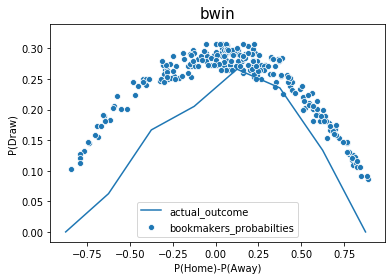

In [231]:
bin_data = bets_final[bets_final['odd_bookmakers']=='bwin'][['home-away', 'draw_flag']]
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
bin_data['range'] = pd.cut(bin_data['home-away'], bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], right=True, labels=False)+1
actual = bin_data.groupby(['range']).sum()/bin_data.groupby(['range']).count()
bin_ranges = []
for i in range(len(bins)-1):
    bin_ranges.append((bins[i]+ bins[i+1])/2)
ax = sns.scatterplot(x="home-away", 
                       y="norm_odd_x",
                       data=bets_final[bets_final['odd_bookmakers']=='bwin']).set_title('bwin', fontsize = 15)


plt.plot(bin_ranges,actual['draw_flag'])
plt.xlabel('P(Home)-P(Away)')
plt.ylabel('P(Draw)')
plt.legend(loc='best', labels=['actual_outcome', 'bookmakers_probabilties'])

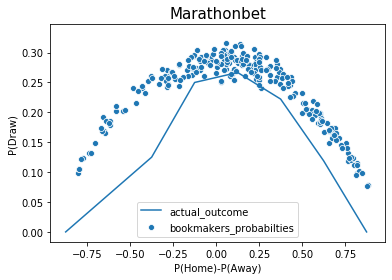

In [233]:
bin_data = bets_final[bets_final['odd_bookmakers']=='Marathonbet'][['home-away', 'draw_flag']]
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
bin_data['range'] = pd.cut(bin_data['home-away'], bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], right=True, labels=False)+1
actual = bin_data.groupby(['range']).sum()/bin_data.groupby(['range']).count()
bin_ranges = []
for i in range(len(bins)-1):
    bin_ranges.append((bins[i]+ bins[i+1])/2)
ax = sns.scatterplot(x="home-away", 
                       y="norm_odd_x",
                       data=bets_final[bets_final['odd_bookmakers']=='Marathonbet']).set_title('Marathonbet', fontsize = 15)


plt.plot(bin_ranges,actual['draw_flag'])
plt.xlabel('P(Home)-P(Away)')
plt.ylabel('P(Draw)')
plt.legend(loc='best', labels=['actual_outcome', 'bookmakers_probabilties'])

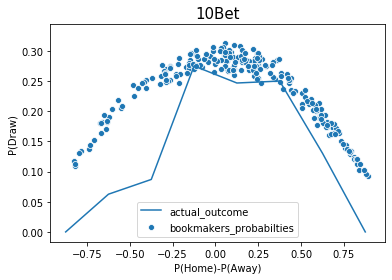

In [234]:
bin_data = bets_final[bets_final['odd_bookmakers']=='10Bet'][['home-away', 'draw_flag']]
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
bin_data['range'] = pd.cut(bin_data['home-away'], bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], right=True, labels=False)+1
actual = bin_data.groupby(['range']).sum()/bin_data.groupby(['range']).count()
bin_ranges = []
for i in range(len(bins)-1):
    bin_ranges.append((bins[i]+ bins[i+1])/2)
ax = sns.scatterplot(x="home-away", 
                       y="norm_odd_x",
                       data=bets_final[bets_final['odd_bookmakers']=='10Bet']).set_title('10Bet', fontsize = 15)


plt.plot(bin_ranges,actual['draw_flag'])
plt.xlabel('P(Home)-P(Away)')
plt.ylabel('P(Draw)')
plt.legend(loc='best', labels=['actual_outcome', 'bookmakers_probabilties'])

* for each bookmaker, eventhough we can see a slight improvement compated to Task 2 as we expected by cleaning noise, the odds has not been well-aligned with the actual outcome. Since the number of red cards in the first ten minutes are very low, they were not effective as much as last minute goals.